In [94]:
import pandas as pd
import numpy as np
import string
from datetime import datetime
import statistics
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from collections import Counter

plt.rcParams["figure.figsize"]=(20, 10)

# Dataset

Used Cars Dataset
Vehicles listings from Craigslist.org

https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [95]:
cars = pd.read_csv('vehicles.csv')

In [96]:
cars.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


# Dataset motivation

Motivation: Find price based on other attributes \
ML type: regression

# Visualization

In [97]:
def drop_columns(data_set, columns_to_drop: list):
    data_set.drop(columns_to_drop, axis='columns', inplace=True)

### Get rid of meta data

In [98]:
drop_columns(cars, ['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'posting_date', 'lat', 'long'])

In [99]:
cars.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

### Some info about the dataset

In [100]:
cars.manufacturer.describe()

count     439993
unique        43
top         ford
freq       79666
Name: manufacturer, dtype: object

In [101]:
cars.isnull().any()

id              False
region          False
price           False
year             True
manufacturer     True
model            True
condition        True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
drive            True
size             True
type             True
paint_color      True
state           False
dtype: bool

In [102]:
cars.head(20)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al
1,1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al
2,2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al
3,3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al
4,4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al
5,5,auburn,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,NaN,NaN,pickup,red,al
6,6,auburn,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,rwd,NaN,coupe,blue,al
7,7,auburn,41990,2012.0,chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,rwd,NaN,coupe,red,al
8,8,auburn,31990,2017.0,jeep,wrangler unlimited sport s,good,6 cylinders,gas,29614.0,clean,other,4wd,NaN,other,NaN,al
9,9,auburn,490,2019.0,ford,transit connect wagon xlt,excellent,4 cylinders,gas,4775.0,clean,automatic,NaN,NaN,van,NaN,al


In [103]:
def plot_count(col, title):
    count = Counter(list(col))
    x, y = zip(*count.most_common())

#     plt.figure(figsize=[8,6])

    plt.bar(x, y, )
    for i, val in enumerate(y):
               plt.annotate(val, (x[i], y[i]), color='b')
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.grid(True, axis='y')
    plt.show()

### Car condition

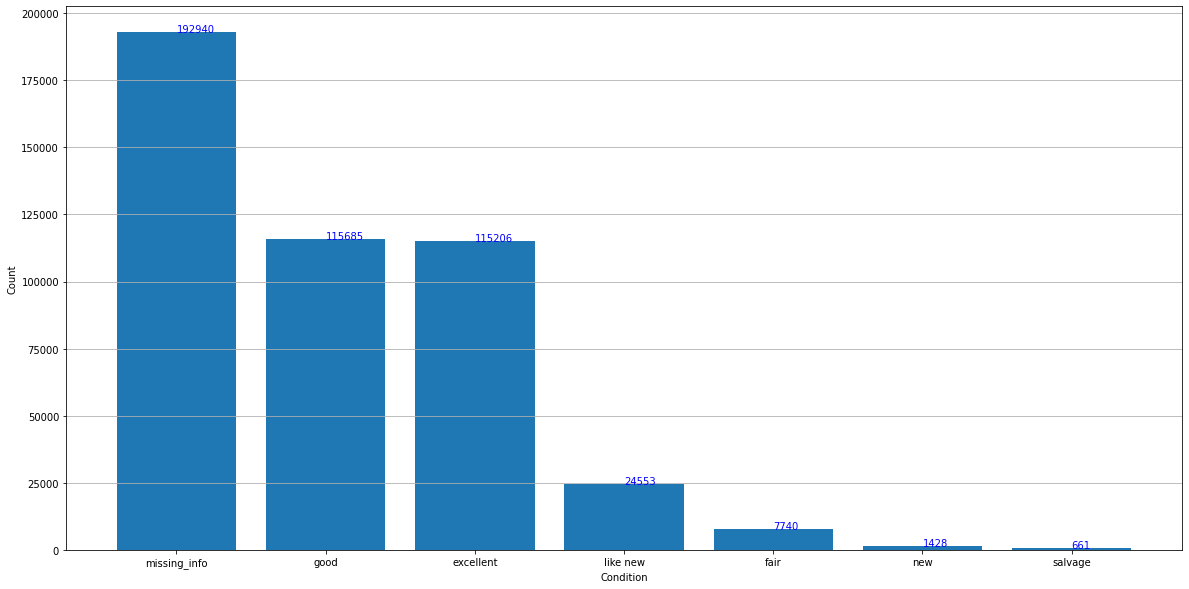

In [104]:
condition = cars.condition.replace(np.nan, 'missing_info')
plot_count(condition, 'Condition')

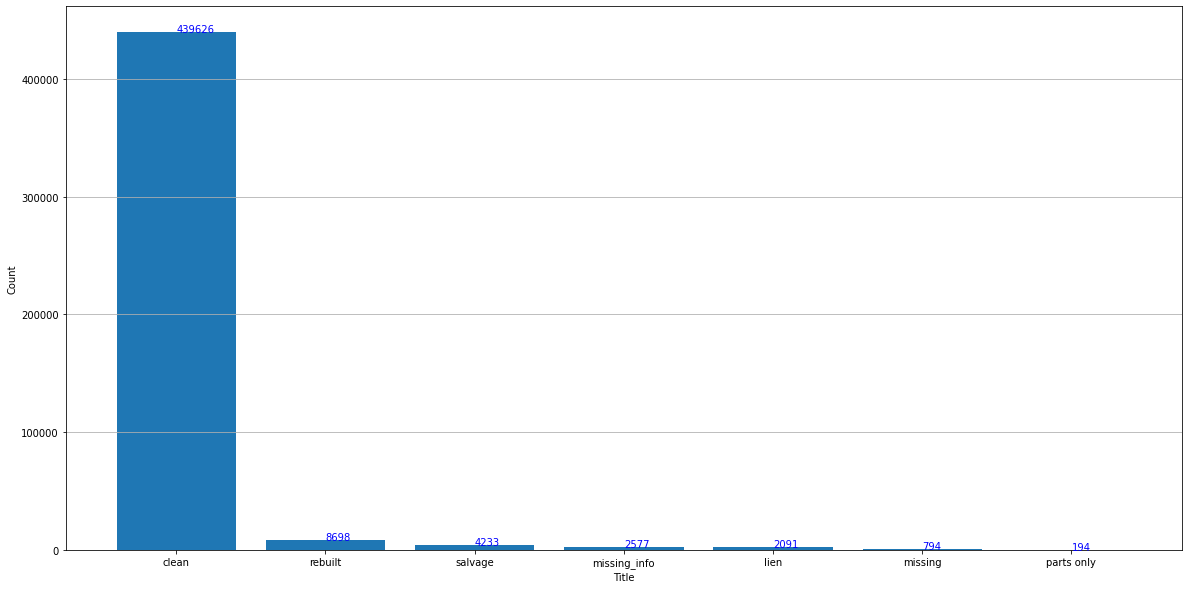

In [105]:
title_status = cars.title_status.replace(np.nan, 'missing_info')
plot_count(title_status, 'Title')

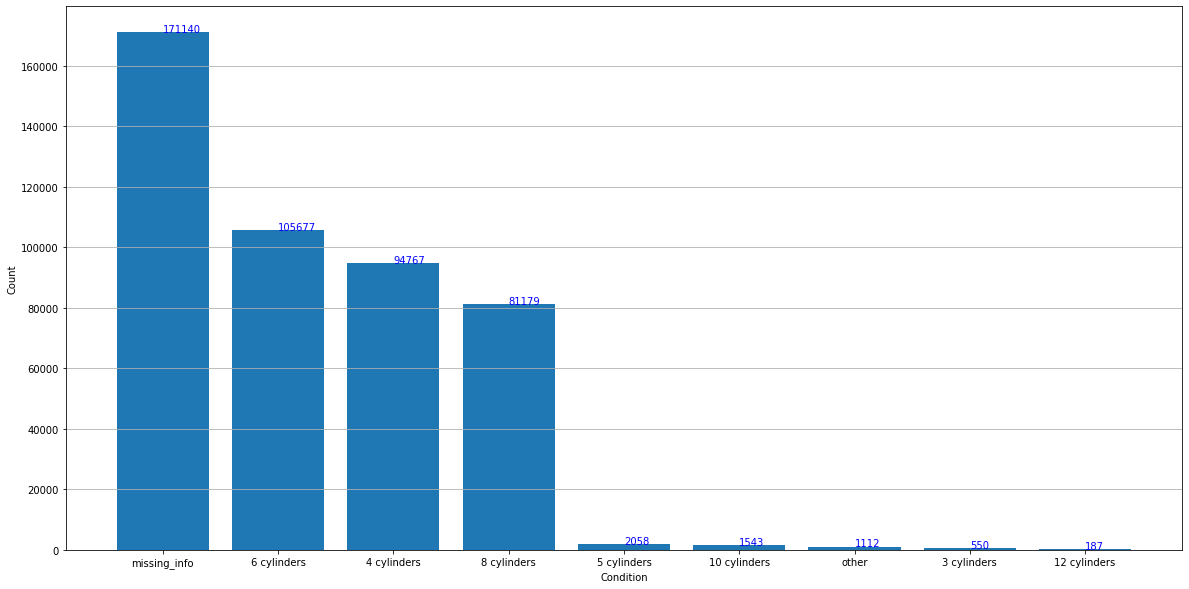

In [106]:
cylinders = cars.cylinders.replace(np.nan, 'missing_info')
plot_count(cylinders, 'Condition')

### Identify outliers

Get rid of cars other than clean, as their price is dependent on a lot of other factors like damages